# Tarea 2

## Ejercicio 1

El procedimeinto usado para calcular el SNR de las señales es a partir de la relación entre la amplitud de pico a pico de la señal y del ruido. El procedimiento es el propuesto en [1]

In [2]:
import scipy.io
from numpy import ptp, zeros, mean
import biosignalsnotebooks as bsnb
from math import log10
import matplotlib.pyplot as plt

Cargamos las señales

In [3]:
limpio = scipy.io.loadmat('ecg_limpio.mat')['ecg_limpio'].reshape(245000)
snr1 = scipy.io.loadmat('ECG_snr1.mat')['ECG_snr1'].reshape(245000)
snr2 = scipy.io.loadmat('ECG_snr2.mat')['ECG_snr2'].reshape(245000)
snr3 = scipy.io.loadmat('ECG_snr3.mat')['ECG_snr3'].reshape(245000)
snr4 = scipy.io.loadmat('ECG_snr4.mat')['ECG_snr4'].reshape(245000)

Conseguimos las amplitudes de pico a pico

In [4]:
vpp_limpio= ptp(limpio)
vpp_snr1=ptp(snr1)
vpp_snr2=ptp(snr2)
vpp_snr3=ptp(snr3)
vpp_snr4=ptp(snr4)

Buscamos los picos R

In [5]:
sampling_rate = 1000
time_r_peaks_limpio, amplitude_r_peaks_limpio = bsnb.detect_r_peaks(limpio, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr1, amplitude_r_peaks_snr1 = bsnb.detect_r_peaks(snr1, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr2, amplitude_r_peaks_snr2 = bsnb.detect_r_peaks(snr2, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr3, amplitude_r_peaks_snr3 = bsnb.detect_r_peaks(snr3, sampling_rate, time_units=True, plot_result=False)
time_r_peaks_snr4, amplitude_r_peaks_snr4 = bsnb.detect_r_peaks(snr4, sampling_rate, time_units=True, plot_result=False)

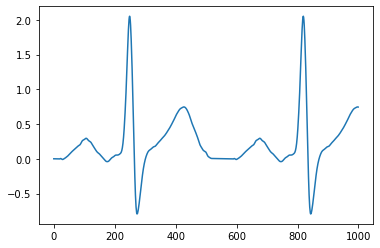

In [6]:
plt.plot(limpio[0:1000])

Conseguimos la amplitud del ruido a partir del intervalo entre cada latido. El razonamiento es que mientras más limpia está la señal, la amplitud en este segmento es menor mientras menos sea el ruido

In [7]:
vpp_noise_limpio = []

for t in time_r_peaks_limpio:
    start = int((t + 0.37) * sampling_rate) # 0.37 - time between a peak and a flat 
    end = int((t + 0.45)* sampling_rate) # 0.45 time between a peak and the end of the flat
    interval = limpio[start:end]
    vpp = ptp(interval)
    vpp_noise_limpio.append(vpp)
    
vpp_noise_limpio_mean = mean(vpp_noise_limpio)


vpp_noise_snr1 = []

for t in time_r_peaks_snr1:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate)
    interval = snr1[start:end]
    vpp = ptp(interval)
    vpp_noise_snr1.append(vpp)
    
vpp_noise_snr1_mean = mean(vpp_noise_snr1)


vpp_noise_snr2 = []

for t in time_r_peaks_snr3:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate)
    interval = snr2[start:end]
    vpp = ptp(interval)
    vpp_noise_snr2.append(vpp)
    
vpp_noise_snr2_mean = mean(vpp_noise_snr2)


vpp_noise_snr3 = []

for t in time_r_peaks_snr3:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate)
    interval = snr3[start:end]
    vpp = ptp(interval)
    vpp_noise_snr3.append(vpp)
    
vpp_noise_snr3_mean = mean(vpp_noise_snr3)


vpp_noise_snr4 = []

for t in time_r_peaks_snr4:
    start = int((t + 0.37) * sampling_rate)
    end = int((t + 0.45)* sampling_rate)
    interval = snr4[start:end]
    vpp = ptp(interval)
    vpp_noise_snr4.append(vpp)
    
vpp_noise_snr4_mean = mean(vpp_noise_snr4)

La amplitud de los ruidos

In [8]:
print(vpp_noise_limpio_mean)
print(vpp_noise_snr1_mean)
print(vpp_noise_snr2_mean)
print(vpp_noise_snr3_mean)
print(vpp_noise_snr4_mean)

0.24920394517023822
0.3019588704885435
0.3597726148737239
0.4719574139952219
0.6911999455337515


Calculamos el SNR

In [9]:
snr_ecg_db_limpio = 20 * log10(vpp_limpio/vpp_noise_limpio_mean)
snr_ecg_db_snr1 = 20 * log10(vpp_snr1/vpp_noise_snr1_mean)
snr_ecg_db_snr2 = 20 * log10(vpp_snr2/vpp_noise_snr2_mean)
snr_ecg_db_snr3 = 20 * log10(vpp_snr3/vpp_noise_snr3_mean)
snr_ecg_db_snr4 = 20 * log10(vpp_snr4/vpp_noise_snr4_mean)

In [10]:
print("SNR para la señal limpio: {} dB".format(snr_ecg_db_limpio))
print("SNR para la señal snr1: {} dB".format(snr_ecg_db_snr1))
print("SNR para la señal snr2: {} dB".format(snr_ecg_db_snr2))
print("SNR para la señal snr3: {} dB".format(snr_ecg_db_snr3))
print("SNR para la señal snr4: {} dB".format(snr_ecg_db_snr4))

SNR para la señal limpio: 21.15337876895188 dB
SNR para la señal snr1: 19.915218914247983 dB
SNR para la señal snr2: 18.713048126463995 dB
SNR para la señal snr3: 16.923334459781696 dB
SNR para la señal snr4: 14.59558725385579 dB


De acuerdo a [2]. Un SNR mayor a 0 representa que hay más señal que ruido. Además, un SNR superior a 10dB en la señal de ECG permite reconocer arritmias cardíacas con más de 96% de precisión 

2. Graficas de SNR en el tiempo

In [11]:
vpp_limpio_array = []

for t in time_r_peaks_limpio:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = limpio[start:end]
    vpp = ptp(interval)
    vpp_limpio_array.append(vpp)

    
vpp_snr1_array = []

for t in time_r_peaks_snr1:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr1[start:end]
    vpp = ptp(interval)
    vpp_snr1_array.append(vpp)
    
    
vpp_snr2_array = []

for t in time_r_peaks_snr2:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr2[start:end]
    vpp = ptp(interval)
    vpp_snr2_array.append(vpp)


vpp_snr3_array = []

for t in time_r_peaks_snr3:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr3[start:end]
    vpp = ptp(interval)
    vpp_snr3_array.append(vpp)
    
    
vpp_snr4_array = []

for t in time_r_peaks_snr4:
    start = int((t) * sampling_rate)
    end = int((t+0.2)* sampling_rate) 
    interval = snr4[start:end]
    vpp = ptp(interval)
    vpp_snr4_array.append(vpp)

In [30]:
snr_ecg_db_limpio_array = ([20 * log10(i / j) for i, j in zip(vpp_limpio_array, vpp_noise_limpio)])
snr_ecg_db_snr1_array = ([20 * log10(i / j) for i, j in zip(vpp_snr1_array, vpp_noise_snr1)])
snr_ecg_db_snr2_array = ([20 * log10(i / j) for i, j in zip(vpp_snr2_array, vpp_noise_snr2)])
snr_ecg_db_snr3_array = ([20 * log10(i / j) for i, j in zip(vpp_snr3_array, vpp_noise_snr3)])
snr_ecg_db_snr4_array = ([20 * log10(i / j) for i, j in zip(vpp_snr4_array, vpp_noise_snr4)])

In [40]:
snr_limpio_mean_array = [snr_ecg_db_limpio_array[0]]
for i in range(1,len(snr_ecg_db_limpio_array)):
    snr_limpio_mean_array.append(mean(snr_ecg_db_limpio_array[0:i]))
    
snr_snr1_mean_array = [snr_ecg_db_snr1_array[0]]
for i in range(1,len(snr_ecg_db_snr1_array)):
    snr_snr1_mean_array.append(mean(snr_ecg_db_snr1_array[0:i]))
    
snr_snr2_mean_array = [snr_ecg_db_snr2_array[0]]
for i in range(1,len(snr_ecg_db_snr2_array)):
    snr_snr2_mean_array.append(mean(snr_ecg_db_snr2_array[0:i]))
    
snr_snr3_mean_array = [snr_ecg_db_snr3_array[0]]
for i in range(1,len(snr_ecg_db_snr3_array)):
    snr_snr3_mean_array.append(mean(snr_ecg_db_snr3_array[0:i]))
    
snr_snr4_mean_array = [snr_ecg_db_snr4_array[0]]
for i in range(1,len(snr_ecg_db_snr4_array)):
    snr_snr4_mean_array.append(mean(snr_ecg_db_snr4_array[0:i]))

SNR en relación a las épocas

Text(0.5, 1.0, 'limpio')

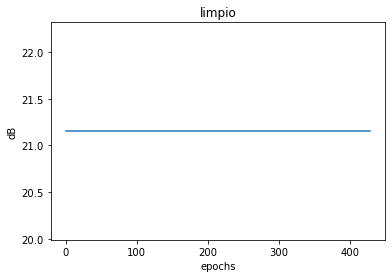

In [45]:
plt.plot(snr_limpio_mean_array)
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('limpio')

Text(0.5, 1.0, 'SNR1')

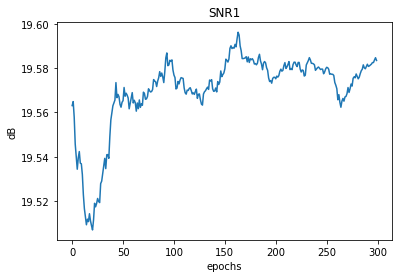

In [44]:
plt.plot(snr_snr1_mean_array[100:400])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR1')

Text(0.5, 1.0, 'SNR2')

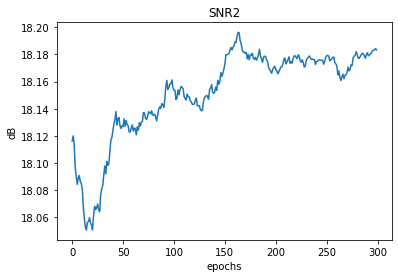

In [46]:
plt.plot(snr_snr2_mean_array[100:400])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR2')

Text(0.5, 1.0, 'SNR3')

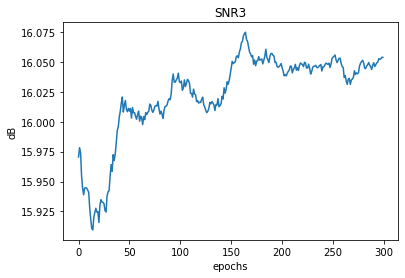

In [47]:
plt.plot(snr_snr3_mean_array[100:400])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR3')

Text(0.5, 1.0, 'SNR4')

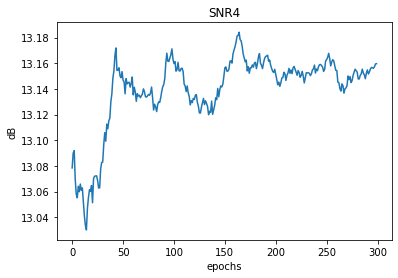

In [48]:
plt.plot(snr_snr4_mean_array[100:400])
plt.ylabel('dB')
plt.xlabel('epochs')
plt.title('SNR4')

Como se ve en las gráficas, el SRN tiende a subir con las épicas. No de una manera uniforme pero esto se puede deber a imperfecciones en el cálculo de la amplitud del ruido

3. Graficar el latido promedio

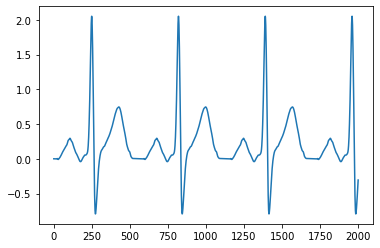

In [51]:
plt.plot(limpio[0:2000])

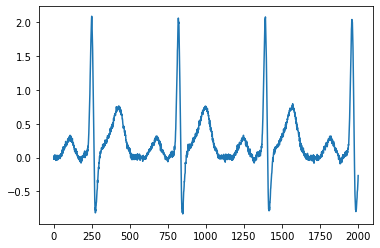

In [50]:
plt.plot(snr1[0:2000])

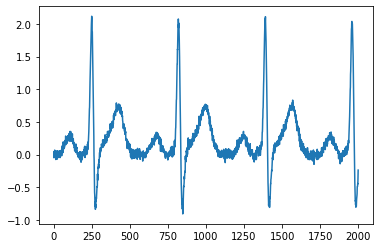

In [52]:
plt.plot(snr2[0:2000])

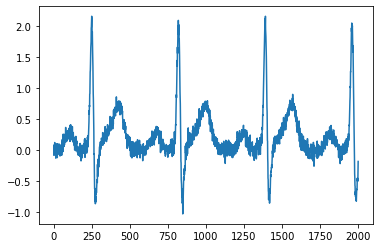

In [53]:
plt.plot(snr3[0:2000])

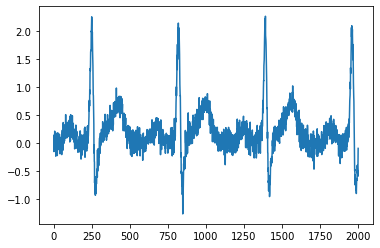

In [54]:
plt.plot(snr4[0:2000])

En general, como se comentaba más arriba en los resultados de los SNR promediados. En ninguno de los casos se deja de identificar los distintos segmentos del ECG y ya que inclusive SNR4 tiene un SNR por encima de 10, un experto podría identificar distintas situaciones como arritmias sin mayores problemas.

## Ejercicio 2

Error al intentar abrir los binarios de los datos. 

## Bibliografía

1. https://biosignalsplux.com/learn/notebooks/Categories/Pre-Process/snr_ECG_rev.php

2. Prasad, G. Krishna, and J. S. Sahambi. "Classification of ECG arrhythmias using multi-resolution analysis and neural networks." TENCON 2003. Conference on convergent technologies for Asia-Pacific region. Vol. 1. IEEE, 2003.
